### MAP556, Ecole Polytechnique, 2022-23

# TP 6 - Gaussian Mixture Models 

There are Coding Questions (CQ) and Theoretical Questions (TQ).
Import first the following librairies.

In [1]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
plt.rcParams["axes.grid"] = False

## Estimation of a GMM model and generation of samples

We consider the following mixture of Gaussians model:
$$
Z \sim \text{Cat}(\varpi_1,\ldots, \varpi_K)
$$
with
$$
X \mid Z = k \sim \mathcal{N}(\mathbf{m}_k, \Sigma_k)
$$
where $\{\varpi_k\}_{k=1,\dots,K}$ are convex weights, $\sum_{k=1}^K \varpi_k= 1$, and $\{\mathbf{m}_k,\Sigma_k\}_{k=1,\dots,K}$ are sequences of means and covariance matrices. 

$\blacktriangleright$ CQ1a. Fix the parameters of the mixture of Gaussians model.

- The weights $\varpi_k$ are given.
- The means $\mathbf{m}_k$ are given.
- The covariances matrix $\Sigma_k$ (semidefinite positive) are randomly given by the Scikit-learn function 'make_spd_matrix'. Use the parameter 'random_state=1' instead of 'random_state=None' to ensure reproducibility of the data.

$\blacktriangleright$ CQ1b. Generate some samples in 2D from this models completing the code below.

- The number $N$ of sampled data is $100$.
- Draw the cluster with respect to the weights.
- Draw a sample from the selected cluster Gaussian law.

In [33]:
## Define the parameters.
# Define the mean points for each of the synthetic cluster centers.
t_means = [[8.4, 8.2], [1.4, 1.6], [2.4, 5.4], [6.4, 2.4]]

# Define the weights for each of the clusters.
t_weights = [0.1, 0.2, 0.15, 0.25]
t_weights = t_weights/np.sum(t_weights)

n = np.size(t_weights)

# For each cluster center, create a positive semidefinite covariance matrix.
# Use make_spd_matrix from Scikit-learn module.
t_covs = []
for i in range(0,n):
    cov = make_spd_matrix(2, random_state=1)
    t_covs.append(cov)
#print(t_covs)
'''
 Complete 
'''

## Generate some data from the model.
# Define the number of samples to be drawn.
N = 100

# Draw with respect to the model.
X = []
for i in range(0,N):
    #print(t_means[i],t_covs[i])
    s = np.random.choice(n,p=t_weights)
    x = np.random.multivariate_normal(t_means[s],t_covs[s])
    X.append(x)
'''
 Complete 
'''

X = np.array(X)
np.random.shuffle(X)
print("Dataset shape:", X.shape)

Dataset shape: (100, 2)


The code below will be used to plot the data and the cluster centers.

In [34]:
# Create a grid for visualization purposes 
x = np.linspace(np.min(X[0,0])-1, np.max(X[1,0])+1, 100)
y = np.linspace(np.min(X[0,1])-1, np.max(X[1,1])+1, 80)

X_,Y_ = np.meshgrid(x,y)
pos = np.array([X_.flatten(),Y_.flatten()]).T

print("pos.shape", pos.shape)
print(np.max(pos[0,1]))

pos.shape (8000, 2)
7.560415854740409


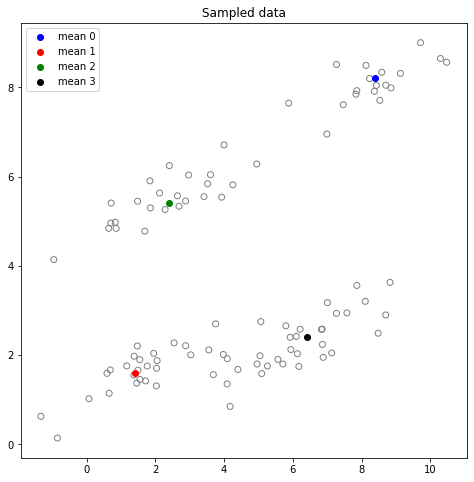

In [51]:
# Draw the sampled data
plt.figure(figsize=(8,int(8)))
plt.title("Sampled data")
axes = plt.gca()
colors = ['blue', 'red', 'green', 'black', 'cyan', 'magenta', 'yellow', 'brown']

plt.scatter(X[...,0], X[...,1], facecolors='none', edgecolors='grey')
    
for j in range(4):
    plt.scatter(t_means[j][0], t_means[j][1], color=colors[j], label="mean {}".format(j))
plt.legend(loc="best")

$\blacktriangleright$ TQ1. Write the likelihood for one observation
$$
L(\theta; x_i) = \dots,
$$
and the complete log-likelihood for the GMM model.

$\blacktriangleright$ TQ2. Recall the principle of the EM algorithm.

- The EM algorithm is an algorithm that ...
- At step $n$ of the algorithm, we have two elementary steps:
 - Given ..., the E-step compute ... 
 - Given ..., the M-step compute ...


$\blacktriangleright$ TQ3. Give the explicit step E and M of the EM algorithm.

- In the E-step, we have to compute
$$
\psi^{(n)}(\theta) = \dots
$$

- In the M-step, we have to ... 
Thanks to the form of the function $\psi^{(n)}$, the resulting expressions for the new parameters are

$$
\varpi^{(n+1)}_k = \dots,
$$

$$
\mathbf{m}^{(n+1)}_k = \dots,
$$
and
$$
\Sigma^{(n+1)}_k = \dots.
$$





In the sequel, we implement the EM algorithm to fit the generated data.

$\blacktriangleright$ CQ2a. Initialize the weight and mean vectors.

In [67]:
# Define the number of clusters to be learned
k = 4
# Create and initialize the cluster centers and the weight parameters
weights = np.ones(k)/k
means = np.ones((4,2))
print("initial means: \n", means)
print("initial weights: \n", weights)

initial means: 
 [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
initial weights: 
 [0.25 0.25 0.25 0.25]


$\blacktriangleright$ CQ2b. Initialize the list of covariance matrices using make_spd_matrix.

In [68]:
# Create and initialize a positive semidefinite covariance matrix 
cov = []
for i in range(k):
    cov_i = make_spd_matrix(2, random_state=1)
    cov.append(cov_i)
    
cov = np.array(cov)

print("cov.shape: ", cov.shape)
print("initial covariance matrices: \n ", cov)

cov.shape:  (4, 2, 2)
initial covariance matrices: 
  [[[1.91269041 0.60964271]
  [0.60964271 0.32640408]]

 [[1.91269041 0.60964271]
  [0.60964271 0.32640408]]

 [[1.91269041 0.60964271]
  [0.60964271 0.32640408]]

 [[1.91269041 0.60964271]
  [0.60964271 0.32640408]]]


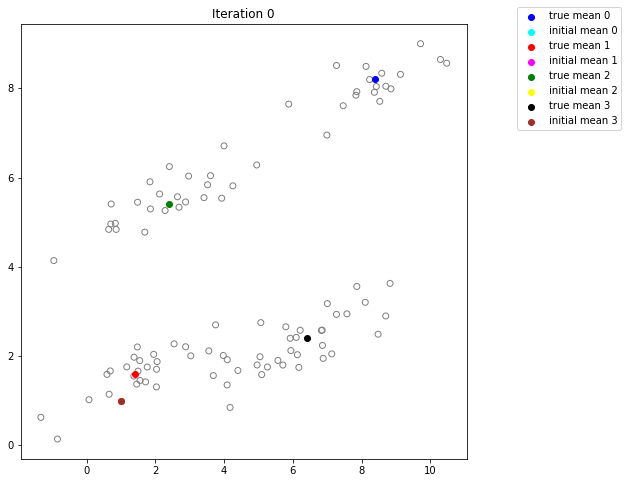

In [69]:
# Visualize the initial clusters among sampled data
plt.figure(figsize=(8,int(8)))
plt.title("Iteration {}".format(0))
axes = plt.gca()

plt.scatter(X[...,0], X[...,1], facecolors='none', edgecolors='grey')
    
for j in range(4):
    plt.scatter(t_means[j][0], t_means[j][1], color=colors[j], label="true mean {}".format(j))
    plt.scatter(means[j][0], means[j][1], color=colors[j+4], label="initial mean {}".format(j))

plt.legend(bbox_to_anchor=(1.1, 1.05))

$\blacktriangleright$ CQ3. Implement the EM algorithm to fit the generated data.

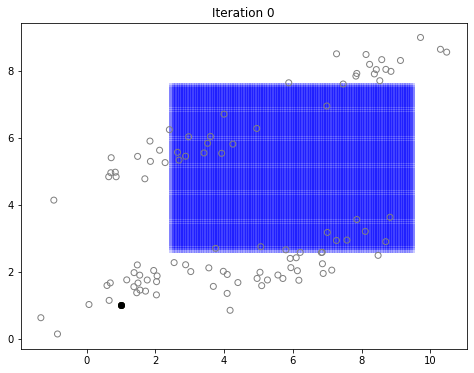

/var/folders/vt/sdb7skj50blfnp70pjvzn9fw0000gn/T/ipykernel_2138/1614586969.py:48: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  w.append(likelihood[j]*weights[j]/np.sum(likelihood[i]*weights[i] for i in range(k)))


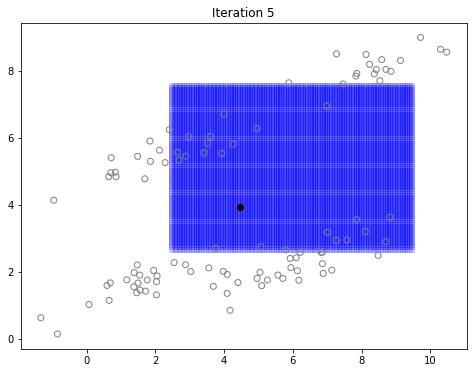

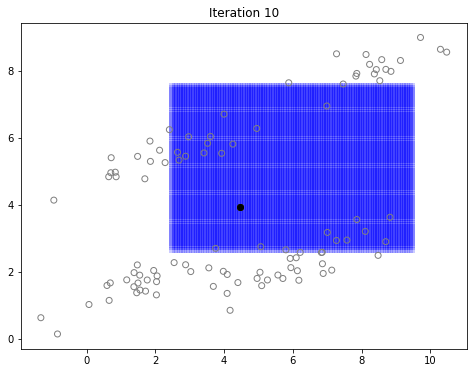

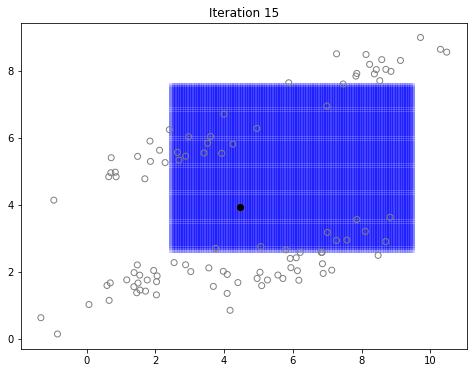

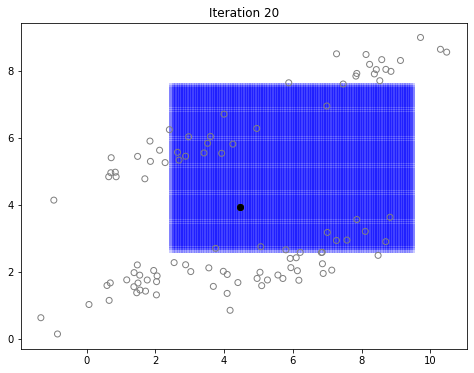

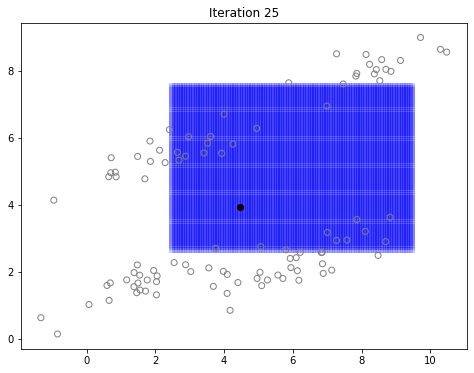

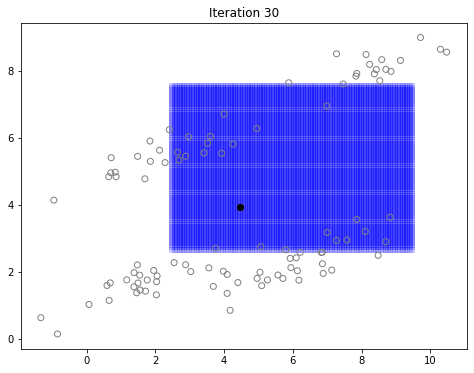

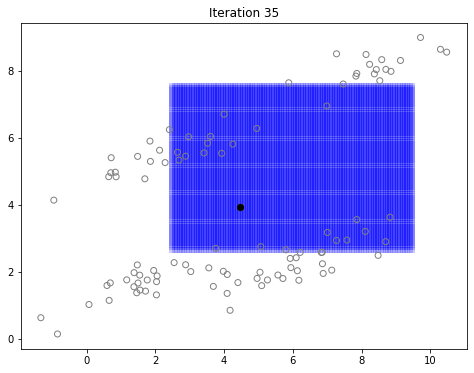

In [73]:
eps=1e-8

# Run GMM for 40 steps
for step in range(40):
    # Visualize the learned clusters
    if step % 5 == 0:
        plt.figure(figsize=(8,int(6)))
        plt.title("Iteration {}".format(step))
        axes = plt.gca()
        
        likelihood = []
        for j in range(k):
            likelihood.append(multivariate_normal.pdf(x=pos, mean=means[j], cov=cov[j]))
        likelihood = np.array(likelihood)
        predictions = np.argmax(likelihood, axis=0)
    
        for c in range(k):
            pred_ids = np.where(predictions == c)
            plt.scatter(pos[pred_ids[0],0], pos[pred_ids[0],1], color=colors[c], alpha=0.2, edgecolors='none', marker='s')
    
        plt.scatter(X[...,0], X[...,1], facecolors='none', edgecolors='grey')
    
        for j in range(k):
            plt.scatter(means[j][0], means[j][1], color=colors[j])

        #plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
        plt.show()

    likelihood = []
    # Expectation step
    for j in range(k):
        '''
        Compute the updated likelihood for each of the clusters
        and the posterior probability for each of the data points
        '''
        likelihood_j=multivariate_normal.pdf(x=X, mean=means[j], cov=cov[j])
        likelihood.append(likelihood_j)
        
    likelihood = np.array(likelihood)
    assert likelihood.shape == (k, len(X))
    
    w = [] # temporary array to avoid erasing old weights
    # Maximization step 
    for j in range(k):
        '''
        Compute the updated cluster centers and the updated weights and updated covariance matrices
        '''
        w.append(likelihood[j]*weights[j]/np.sum(likelihood[i]*weights[i] for i in range(k)))

        # updage mean and variance
        #means[j] = likelihood[j]*weights[j]*X[j]/(w[j]*np.sum(likelihood[i]*weights[i] for i in range(k)))
        #cov[j] = likelihood[j]*weights[j]*(X[j]-means[j])*(X[j]-means[j]).T/(w[j]*np.sum(likelihood[i]*weights[i] for i in range(k)))
        means[j]=np.sum(w[j].reshape(len(X),1)*X, axis=0)/np.sum(w[j]+eps)
        cov[j]=np.dot((w[j].reshape(len(X),1)*(X-means[j])).T, (X-means[j]))/np.sum(w[j]+eps)
        # update the weights
        weights[j] = np.mean(w[j])
    
    assert cov.shape == (k, X.shape[1], X.shape[1])
    assert means.shape == (k, X.shape[1])

# An application of GMM to MNIST dataset using scikit-learn

Here we aim to sample from handwritten digits from the MNIST dataset. The code below loads and plots some of the image of this dataset.

In [74]:
from sklearn import mixture
from sklearn.datasets import load_digits

digits data shape:  (1797, 64)


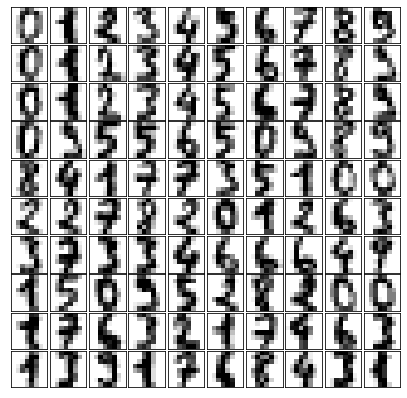

In [75]:
digits = load_digits()
print("digits data shape: ", digits.data.shape)

def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(7, 7),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)

plot_digits(digits.data)

To reduce the dimension we use PCA asking it to preserve 99% of the variance in the projected data.

In [76]:
from sklearn.decomposition import PCA

pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

$\blacktriangleright$ CQ4. Fit a GMM model on the transformed data using the function mixture.GaussianMixture from sklearn.

In [77]:
#Initialise a GMM model using the mixture.GaussianMixture function
gmm = mixture.GaussianMixture('''Complete here''')

'''Complete here : fit the GMM model to the data'''
gmm.fit(data)

print(gmm.converged_)

TypeError: '<' not supported between instances of 'int' and 'str'

$\blacktriangleright$ CQ5. Generate new samples from the fitted GMM and plot the resulting image

In [ ]:
data_new, _ = '''Complete here'''
digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new)